In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sn
from sklearn.datasets import load_iris

In [25]:
data = load_iris()

In [26]:
dir(data)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [39]:
data.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [27]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
data.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

<Axes: >

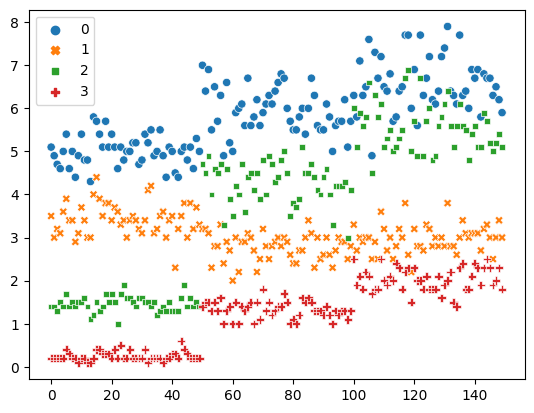

In [40]:
sn.scatterplot(data.data)

In [6]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [7]:
tar = data.target

In [8]:
from sklearn.preprocessing import OneHotEncoder

In [75]:
type(tar)
tar = tar.reshape(-1,1)

In [76]:
ohe = OneHotEncoder(handle_unknown='ignore')
tar = ohe.fit_transform(tar).toarray()

In [77]:
tar_in = tar[:,1:]

In [78]:
tar_in

array([[0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [0., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [9]:
x = data.data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(x, data.target, test_size=0.2)

In [11]:
X_train.shape

(120, 4)

In [12]:
y_test = y_test.reshape(-1,1)

In [13]:
y_test

array([[2],
       [0],
       [2],
       [0],
       [2],
       [2],
       [2],
       [1],
       [1],
       [2],
       [0],
       [2],
       [2],
       [0],
       [0],
       [0],
       [0],
       [2],
       [1],
       [0],
       [1],
       [2],
       [2],
       [1],
       [1],
       [1],
       [2],
       [0],
       [1],
       [1]])

In [14]:
y_train = y_train.reshape(-1,1)

In [15]:
y_train

array([[2],
       [0],
       [0],
       [2],
       [1],
       [0],
       [0],
       [2],
       [2],
       [0],
       [2],
       [2],
       [0],
       [1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [2],
       [1],
       [1],
       [0],
       [2],
       [2],
       [1],
       [2],
       [0],
       [2],
       [0],
       [2],
       [0],
       [2],
       [0],
       [2],
       [1],
       [1],
       [2],
       [0],
       [1],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [2],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [2],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [2],
       [1],
       [0],
       [1],
       [1],
       [2],
       [0],
       [2],
       [1],
       [0],
       [2],
       [2],
       [2],
       [0],
       [0],
    

In [16]:
logi = LogisticRegression()
logi.fit(X_train, y_train)

/Users/mac/opt/anaconda3/envs/tf-up/lib/python3.9/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [17]:
predict = logi.predict(X_test)

In [18]:
logi.score(X_test, y_test)

1.0

In [19]:
cm = confusion_matrix(y_test, predict)

In [20]:
cm

array([[ 9,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 12]])

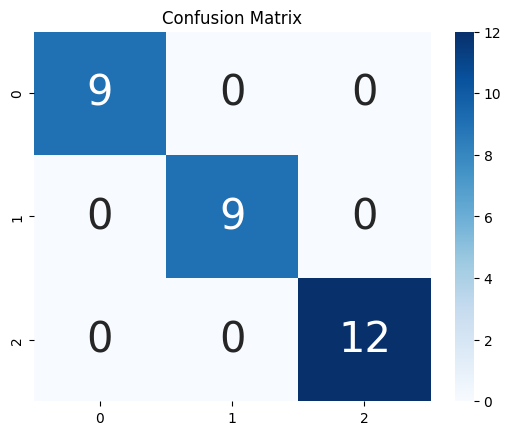

In [21]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
# confusion matrix sns heatmap 
ax = plt.axes()
sns.heatmap(cm, annot=True, annot_kws={"size": 30}, fmt='d', cmap="Blues", ax=ax)
ax.set_title('Confusion Matrix')
plt.show()  # Display the plot

# Example for crosstab

In [22]:
data = {
    'Category': ['A', 'B', 'A', 'C', 'C', 'B', 'A', 'C'],
    'Gender': ['Male', 'Female', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male']
}

df = pd.DataFrame(data)

# Create a cross-tabulation
cross_tab = pd.crosstab(index=df['Category'], columns=df['Gender'], margins=True, margins_name='Total')

# Display the cross-tabulation
print(cross_tab)

Gender    Female  Male  Total
Category                     
A              2     1      3
B              2     0      2
C              0     3      3
Total          4     4      8


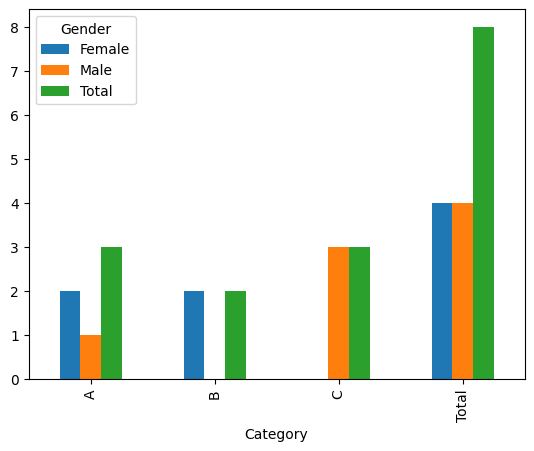

In [23]:
cross_tab = pd.crosstab(index=df['Category'], columns=df['Gender'], margins=True, margins_name='Total').plot(kind='bar')
